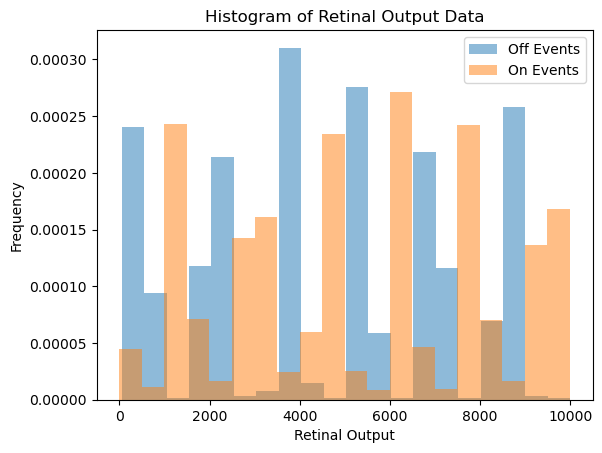

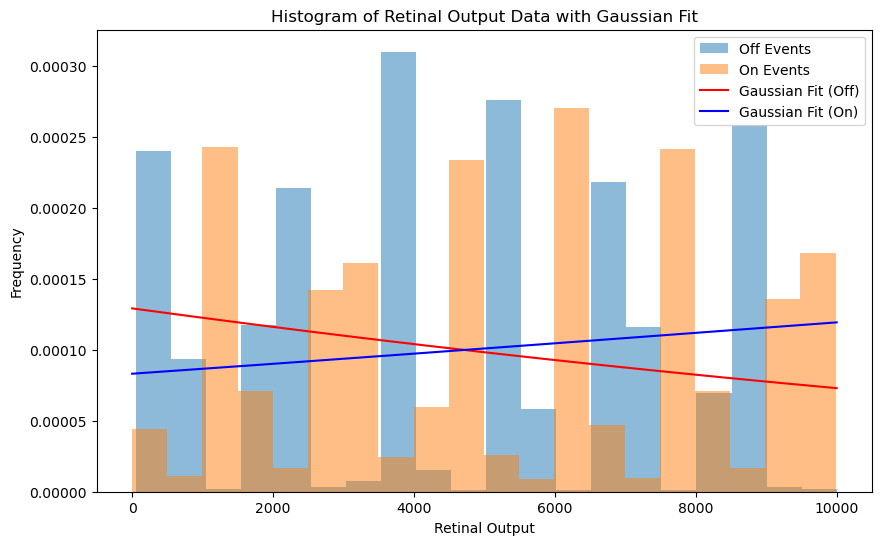

Off Gaussian Parameters:
Amplitude (A): 0.0005306040255305339
Mean (mu): -53995.45454512611
Standard Deviation (sigma): 32131.7964819728

On Gaussian Parameters:
Amplitude (A): 0.00018893827540963478
Mean (mu): 39669.27338928451
Standard Deviation (sigma): 30975.477724378045


In [2]:
#!/usr/bin/env python
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

'''Retinal outputs at a single frequency imported'''

import vertical_bars_neg_vel2  
import vertical_bars_pos_vel2

'''DO NOT change the retina data parameters!!!'''

retina_grid_size = 81 ##DONT CHANGE RETINA PARAMETERS!!!
retWinColLen = 12
retWinRowLen = 12
retTotalLen = 19

eventos_off = []
eventos_on = []

for loop in range(0, retWinRowLen):
    retCurrentPointer = retTotalLen * loop
    for current_indices in range(retCurrentPointer, retCurrentPointer + retWinColLen):
        eventos_off.append(np.asarray(vertical_bars_neg_vel2.eventos, dtype=object)[current_indices])
        eventos_on.append(np.asarray(vertical_bars_pos_vel2.eventos, dtype=object)[current_indices])
        
# Step 1: Plot histogram of retinal output data
data_off = np.concatenate(eventos_off)
data_on = np.concatenate(eventos_on)

# Step 1: Plot histogram of retinal output data
hist_off, bins_off, _ = plt.hist(data_off, bins=20, alpha=0.5, label='Off Events', density=True)
hist_on, bins_on, _ = plt.hist(data_on, bins=20, alpha=0.5, label='On Events', density=True)
plt.xlabel('Retinal Output')
plt.ylabel('Frequency')
plt.title('Histogram of Retinal Output Data')
plt.legend()
plt.show()

# Step 2: Fit Gaussian curve to histogram
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Initial guess for parameters
guess_off = [1, np.mean(data_off), np.std(data_off)]
guess_on = [1, np.mean(data_on), np.std(data_on)]

# Fit Gaussian curve to data
params_off, cov_off = curve_fit(gaussian, bins_off[:-1], hist_off, p0=guess_off)
params_on, cov_on = curve_fit(gaussian, bins_on[:-1], hist_on, p0=guess_on)

# Step 3: Determine parameters of Gaussian curve
A_off, mu_off, sigma_off = params_off
A_on, mu_on, sigma_on = params_on

# Step 4: Plot Gaussian fit
x = np.linspace(min(data_off.min(), data_on.min()), max(data_off.max(), data_on.max()), 1000)
plt.figure(figsize=(10, 6))
plt.hist(data_off, bins=20, alpha=0.5, label='Off Events', density=True)
plt.hist(data_on, bins=20, alpha=0.5, label='On Events', density=True)
plt.plot(x, gaussian(x, *params_off), color='red', label='Gaussian Fit (Off)')
plt.plot(x, gaussian(x, *params_on), color='blue', label='Gaussian Fit (On)')
plt.xlabel('Retinal Output')
plt.ylabel('Frequency')
plt.title('Histogram of Retinal Output Data with Gaussian Fit')
plt.legend()
plt.show()

print("Off Gaussian Parameters:")
print("Amplitude (A):", A_off)
print("Mean (mu):", mu_off)
print("Standard Deviation (sigma):", sigma_off)

print("\nOn Gaussian Parameters:")
print("Amplitude (A):", A_on)
print("Mean (mu):", mu_on)
print("Standard Deviation (sigma):", sigma_on)
